In [1]:
import razor.flow as rf
from razor.api import datasources
import numpy as np
import logging
logger = logging.getLogger()

In [2]:
@rf.block
class CustomValidator:
    num: int

    @rf.validator('num', help='Input should a non-negative integer.')
    def validate_num(val):
        return val>=0
        
    def run(self):
        logger.info(self.num)

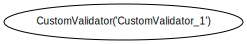

In [3]:
config = {'cores': 1, 'ram': 4096}

cust_val = CustomValidator(num=2)
cust_val.executor = rf.ContainerExecutor(cores=config['cores'], memory=config['ram'])

pipeline = rf.Pipeline(name='custom_validator', targets=[cust_val])
pipeline.show()

In [4]:
def create_pipeline():
    return pipeline